In [30]:
#!pip install imbalanced-learn

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
df = pd.read_csv("./data/변수선택.csv", encoding="CP949")
df.head()

,day,W_s,Dew,Press,See_1,일산화탄소농도,미세먼지농도,초미세먼지농도
0,2022-01-01,0.916291,-15.078261,1020.221739,1,0.624,27.80,0
1,2022-01-02,1.225000,-8.450000,1015.654167,1,0.612,35.32,0
2,2022-01-03,1.063273,-10.100000,1015.504167,1,0.660,25.90,0
3,2022-01-04,1.215160,-10.566667,1016.833333,1,0.594,35.00,0
4,2022-01-05,1.002468,-13.104167,1017.091667,1,0.812,48.26,0


In [33]:
#데이터 불균형 확인
df['초미세먼지농도'].value_counts()

0    330
1     35
Name: 초미세먼지농도, dtype: int64

In [34]:
#train, test 분리
from sklearn.model_selection import train_test_split
feature = df.iloc[:,1:7]
target = df['초미세먼지농도']

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, stratify=target, random_state=100)

In [35]:
#oversampling
from imblearn.over_sampling import RandomOverSampler
X_train2, y_train2 = RandomOverSampler(random_state=0).fit_resample(X_train, y_train)
X_test2, y_test2 = RandomOverSampler(random_state=0).fit_resample(X_test, y_test)

In [36]:
# taget에 대해 불균형 해소
print(y_test.value_counts())
print(y_test2.value_counts())

0    99
1    11
Name: 초미세먼지농도, dtype: int64
0    99
1    99
Name: 초미세먼지농도, dtype: int64


# 모델링
- DNN : 이규린
- DecisionTree: 박지영
- GLM : 김규리
- RandomForest : 유희원


In [37]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [38]:
#모델 성능 상향을 위한 정규화
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train2, y_train2)
#테스트 셋에 대한 예측 결과
y_pred = rfc.predict(X_test2)

In [40]:
from sklearn.metrics import accuracy_score
print('의사결정나무 10개 모델 정확도 : {0:0.4f}'. format(accuracy_score(y_test2, y_pred)))

의사결정나무 10개 모델 정확도 : 0.9444


In [41]:
#의사결정나무 100개 지정. 학습 n_estimators=100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train2, y_train2)

RandomForestClassifier(random_state=0)

In [42]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                               max_depth=None, max_features='auto', max_leaf_nodes=None,
                               min_impurity_decrease=0.0,
                               min_samples_leaf=1, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=100,
                               n_jobs=None, oob_score=False, random_state=None,
                               verbose=0, warm_start=False)

In [43]:
#테스트 셋에 대한 예측 결과
y_pred_100 = rfc_100.predict(X_test2)

In [44]:
print('의사결정나무 100개 모델 정확도 : {0:0.4f}'. format(accuracy_score(y_test2, y_pred_100)))

의사결정나무 100개 모델 정확도 : 0.9444


In [45]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test2,y_pred_100))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        99
           1       0.98      0.91      0.94        99

    accuracy                           0.94       198
   macro avg       0.95      0.94      0.94       198
weighted avg       0.95      0.94      0.94       198



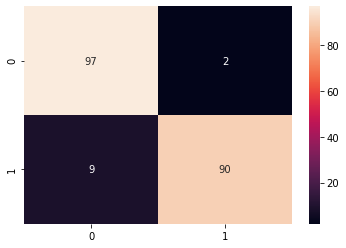

In [46]:
cm = confusion_matrix(y_test2,y_pred_100)
sns.heatmap(cm, annot=True)
plt.show()